In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pickle
from timeit import time
from shape import Shape, Block
from shape_boat import ShapeBoat, ShapeBoat_spline
from shapeshift_trajectory import shapeshift_trajectory, write_results, experiments, print_results_tables

multiboat_trajectory_optimization/boat_models.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/event


## 1. Composing Shapes from Blocks

In [2]:
s = .90625

shape_1a = Shape([Block(0,0,scale=s)])
shape_1b = Shape([Block(0,0,90,scale=s)])
shape_2a = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s)])
shape_2b = Shape([Block(0,0.25,scale=s),   Block(0,-0.25,scale=s)])
shape_2c = Shape([Block(-.25,0,90,scale=s),Block(0.25,0,90,scale=s)])
shape_2d = Shape([Block(0,-.5,90,scale=s) ,Block(0,.5,90,scale=s)])
shape_2e = Shape([Block(0,-0.5,90,scale=s),Block(0.25,0.25,0,scale=s)])
shape_2f = Shape([Block(-0.25,0.25,90,scale=s),Block(0.25,-0.25,90,scale=s)])
shape_3a = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s),   Block(1.25,0.25,90,scale=s)])
shape_3b = Shape([Block(-.5,0,scale=s),    Block(.5,0,0,scale=s), Block(-.5,0.5,scale=s)])
shape_3c = Shape([Block(0,0,scale=s),      Block(-1,0,scale=s),   Block(1,0,scale=s)])
shape_3d = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s),   Block(-.75,0.75,90,scale=s)])
shape_4a = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s),   Block(-1.25,0.25,90,scale=s),Block(1.25,0.25,90,scale=s)])
shape_4b = Shape([Block(-.5,-.25,scale=s), Block(-.5,.25,scale=s),Block(.5,-.25,scale=s),      Block(.5,.25,scale=s)])
shape_6a = Shape([Block(0,0,scale=s),      Block(1.,0,scale=s),   Block(0,0.5,scale=s),        Block(-1.,0.5,scale=s),Block(1.,0.5,scale=s),Block(1.,-.5,scale=s)])

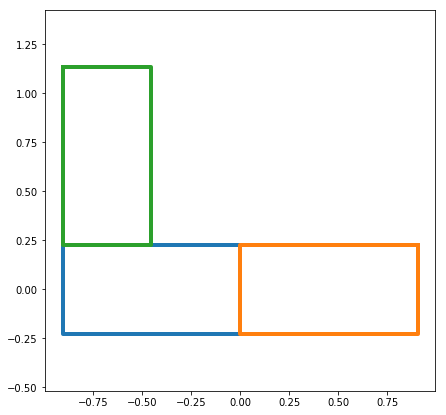

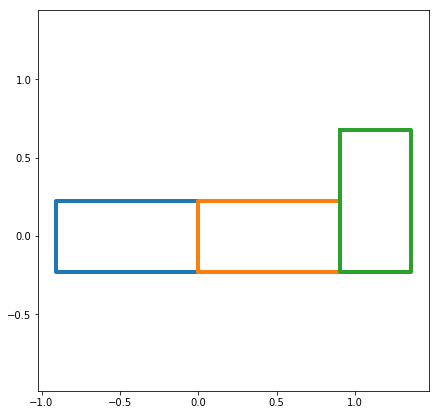

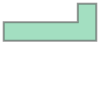

In [3]:
moving_shape=shape_3d
obstacle_shape=shape_3a

moving_shape.plot(union=False)
obstacle_shape.plot(union=False)
from shapely import ops, geometry
obstacle_shape.polygon.simplify(0.2, preserve_topology=False)


### Partitioning of convex hulls around shape

In [4]:
msums, hulls, _ = obstacle_shape.c_space_rotate(moving_shape)
#plot_hulls(hulls, text=False)

### C-Space of a given obstacle b

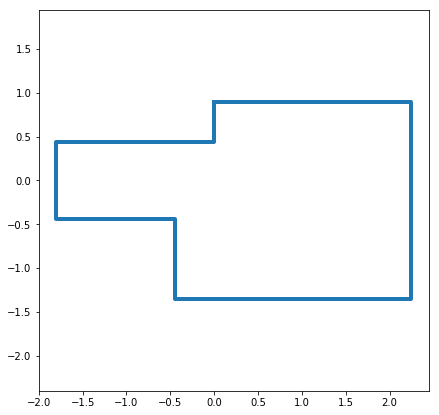

In [5]:
moving_shape.plot_polygons([msums.values()[3]])

### Finding Convex Hull of C-Space

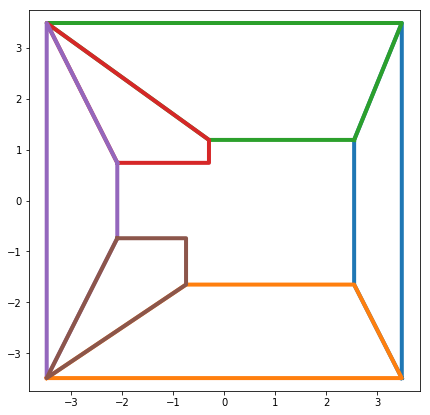

In [6]:
moving_shape.plot_polygons(hulls.values()[3])

## 2. Trajectory Planning

In [7]:
tests = {'1_step1':         (shape_1b, shape_2c, (s*-0.75, s*0.,     0.),  (s*-0.25,    s*1.0,    0.)),  \
         '1_step2':        (shape_2d, shape_1b, (s*-0.5, s*0.5,     0.),  (s*0.0,    s*1.5,    0.)),  \
         '2_step1':         (shape_1b, shape_2c, (s*-.75, s*0.0,     0.),  (s*0.,    s*.75,   90.)), \
         '2_step2':        (shape_2e, shape_1b, (s*-0.5, s*0.5,     0.),  (s*0,    s*1.5,  0.)),  \
         '3_step1':        (shape_1b, shape_2c, (s*-0.75, s*0.,     0.),  (s*-0.75,    s*0.5,    0.)),  \
         '3_step2':        (shape_2f, shape_1b, (s*-0.75, s*0.25,     0.),  (s*0.25,    s*0.75,    0)),  \
         '5':             (shape_6a, shape_6a, (s*0.,    s*1.5,   180.),  (s*-0.01,   s*-0.5,  180.)),  \
         '6':             (shape_3d, shape_3d, (s*0.5, s*1,     180.), (s*0,  s*1.5,    180.)),
         '7':             (shape_3a, shape_3a, (s*-0.01, s*0.5,     180.), (s*0.5,  s*1.0,    180.))
        }

### MIQP - b-splines

SETTING ENDPOINTS
Calculated C-Space: 0.111046 seconds
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[40, 41, 42, 43, 44, 45, 46, 47, 48]
[49, 50, 51, 52, 53, 54, 55, 56, 57]
Set up graph: 0.439312 seconds
finding_vertex POINT (0 1.359375) 180.0
finding_vertex POINT (-0.009062499999999999 -0.453125) 180.0
found path endpoint hulls 36 34
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 193
0.002377 seconds
ADDING COSTS
Number of costs 13
0.005147 seconds
ADDING CONSTRAINTS
None
Number of constraints 1390
0.210626 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.173443 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.079514 seconds
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[40, 41, 42, 43, 44, 45, 46, 47, 48]
[49, 50

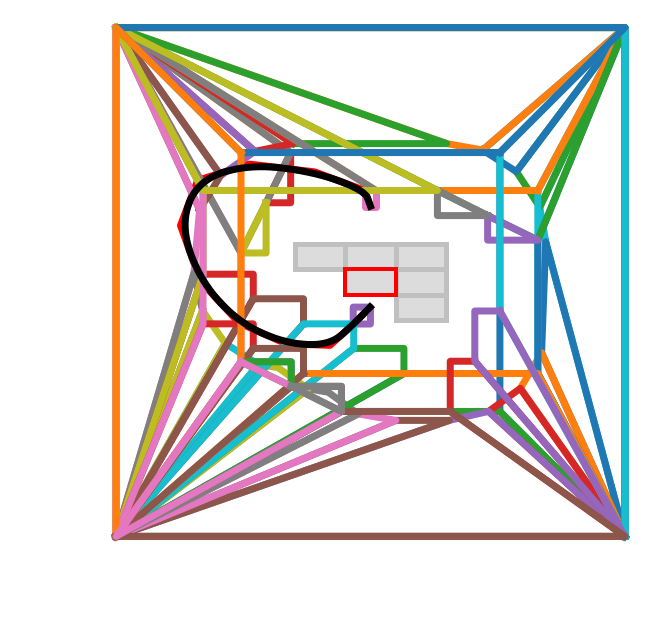

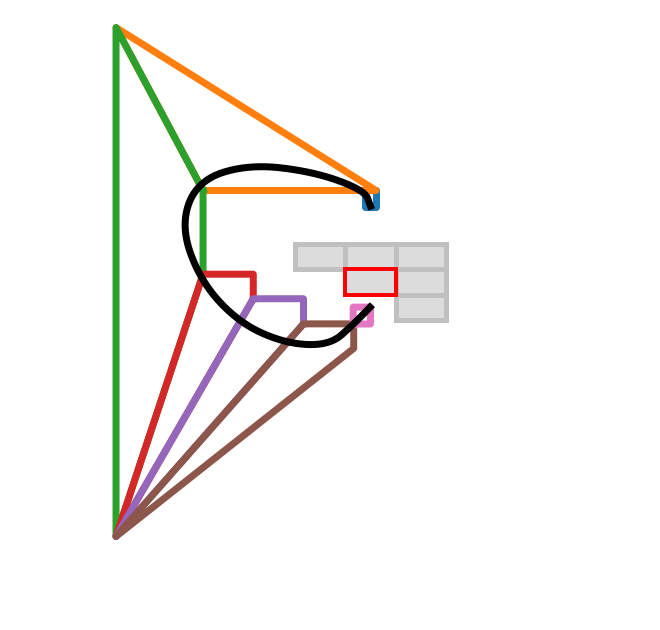

98.6


In [8]:
test = '5'

x = time.time()
experiment = shapeshift_trajectory(*tests[test], N=11, boat_type=ShapeBoat_spline, boat_type_init=ShapeBoat_spline)
#print experiment['S'].shape, experiment['U'].shape
name = test + "_2_13.txt"
np.savetxt(name, np.hstack((experiment['S'][0,:,:],experiment['U'][0,:,:])), delimiter=",")
print len(experiment['S'][0])*0.2
data = {'S':experiment['S'][0],
        'U':experiment['U'][0]}
with open(test + '.pkl', 'wb') as f:
    pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

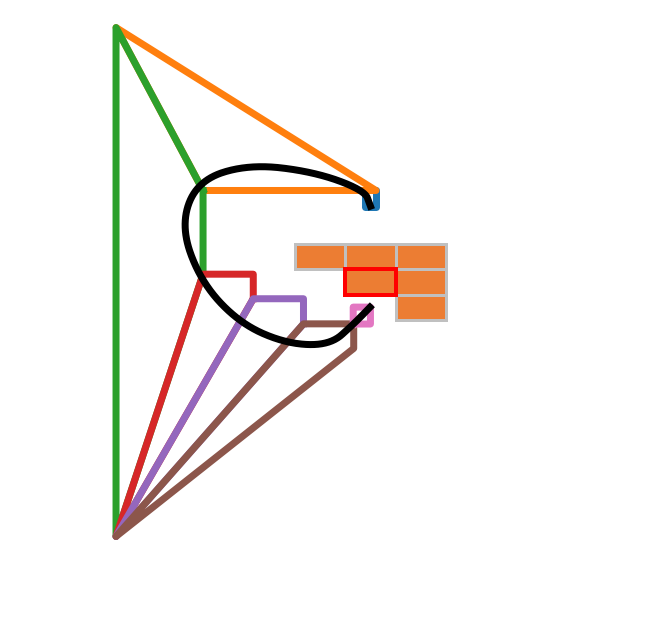

In [9]:
b = experiment['boat']
b.plot_hulls(experiment['S'], text=False, color=True)

###### from pydrake.all import MathematicalProgram

x=MathematicalProgram()

### Animation

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packag

ValueError: outfile must be *.htm or *.html

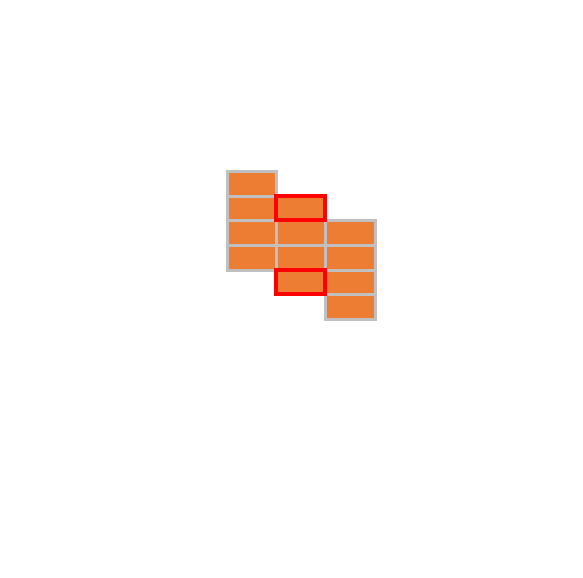

In [11]:
from IPython.display import HTML
x = experiment['boat'].plot_animation(experiment['S'])
x.save('video15.gif', dpi=80, writer='imagemagick', fps=30)
#HTML(experiment['boat'].plot_animation(experiment['S']).to_html5_video())

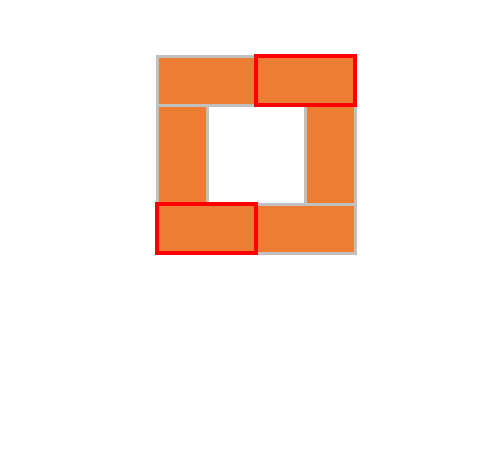

In [15]:
from IPython.display import HTML
HTML(experiment['boat'].plot_animation(experiment['S']).to_html5_video())

### Show polytope graph from plan

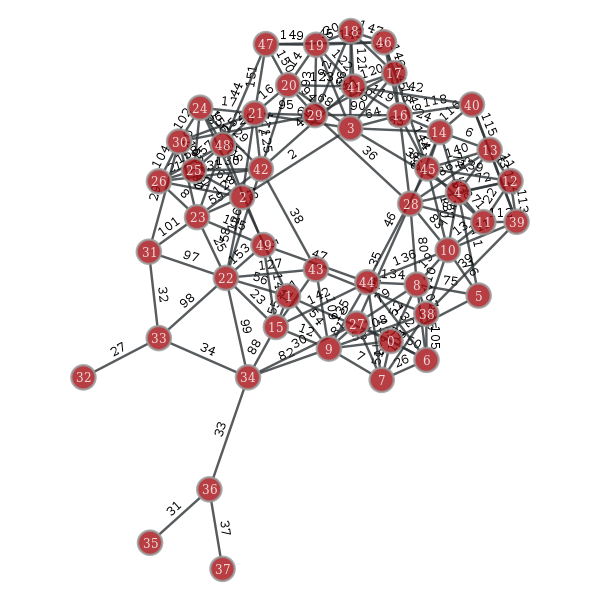

In [35]:
experiment['boat'].g.draw_graph()

## 3. Running Experiments

SETTING ENDPOINTS
Calculated C-Space: 0.138822 seconds
Set up graph: 0.071142 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 21 24
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 182
0.004347 seconds
ADDING COSTS
Number of costs 13
0.011014 seconds
ADDING CONSTRAINTS
None
Number of constraints 950
0.122124 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.165271 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.078293 seconds
Set up graph: 0.068064 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 21 24
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.002083 seconds
ADDING COSTS
Number of costs 12
0.003957 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 28
0.023533 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.03273

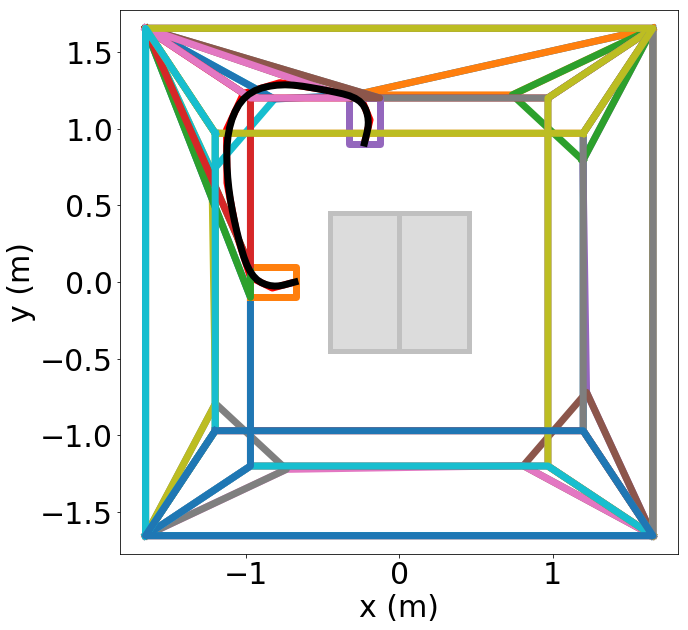

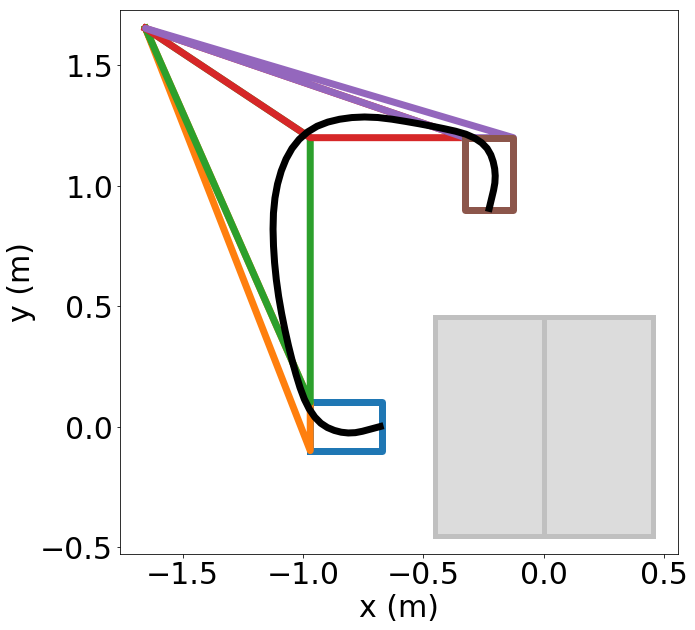

SETTING ENDPOINTS
Calculated C-Space: 0.125208 seconds
Set up graph: 0.149960 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (0 1.359375) 0.0
found path endpoint hulls 28 31
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 182
0.001870 seconds
ADDING COSTS
Number of costs 13
0.004634 seconds
ADDING CONSTRAINTS
None
Number of constraints 950
0.116280 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.232695 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.074123 seconds
Set up graph: 0.107884 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (0 1.359375) 0.0
found path endpoint hulls 28 31
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.002149 seconds
ADDING COSTS
Number of costs 12
0.004129 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 32
0.024339 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.029296 se

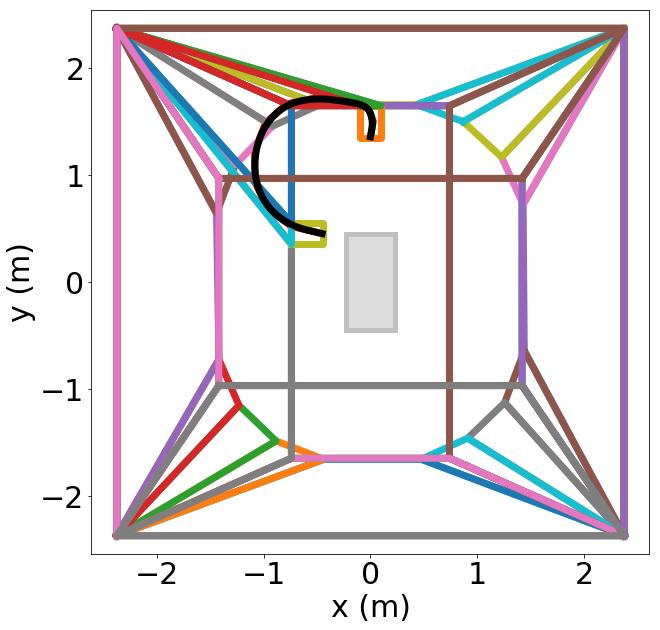

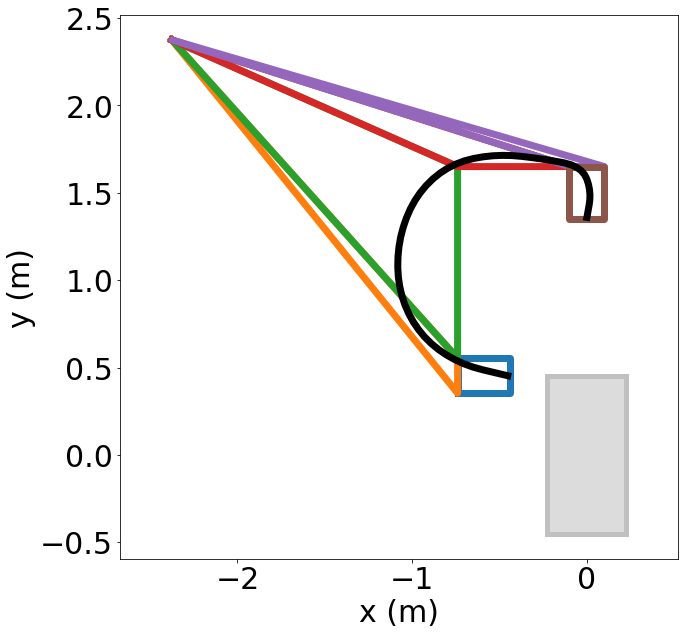

SETTING ENDPOINTS
Calculated C-Space: 0.163633 seconds
Set up graph: 0.654018 seconds
finding_vertex POINT (0 1.359375) 180.0
finding_vertex POINT (-0.009062499999999999 -0.453125) 180.0
found path endpoint hulls 36 34
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 193
0.003940 seconds
ADDING COSTS
Number of costs 13
0.011938 seconds
ADDING CONSTRAINTS
None
Number of constraints 1390
0.401018 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.315072 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.145958 seconds
Set up graph: 0.359652 seconds
finding_vertex POINT (0 1.359375) 180.0
finding_vertex POINT (-0.009062499999999999 -0.453125) 180.0
found path endpoint hulls 36 34
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.002892 seconds
ADDING COSTS
Number of costs 12
0.005564 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 46
0.033525 seconds
PLANNING
SolutionResult.kSolu

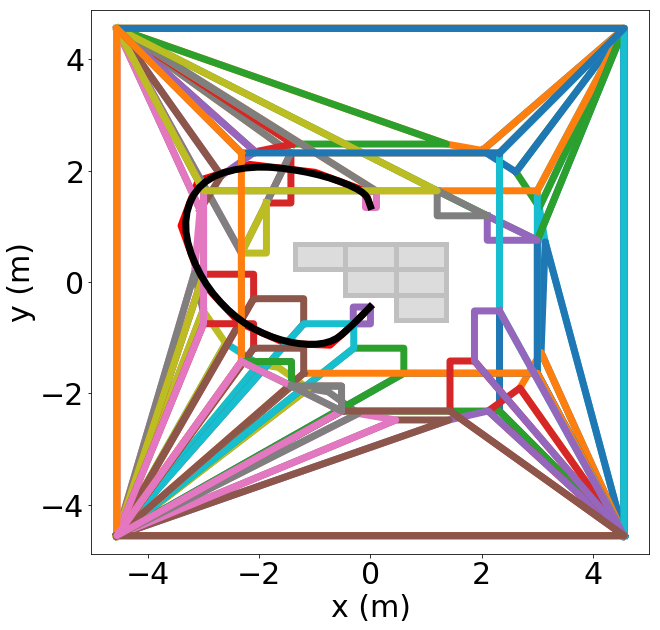

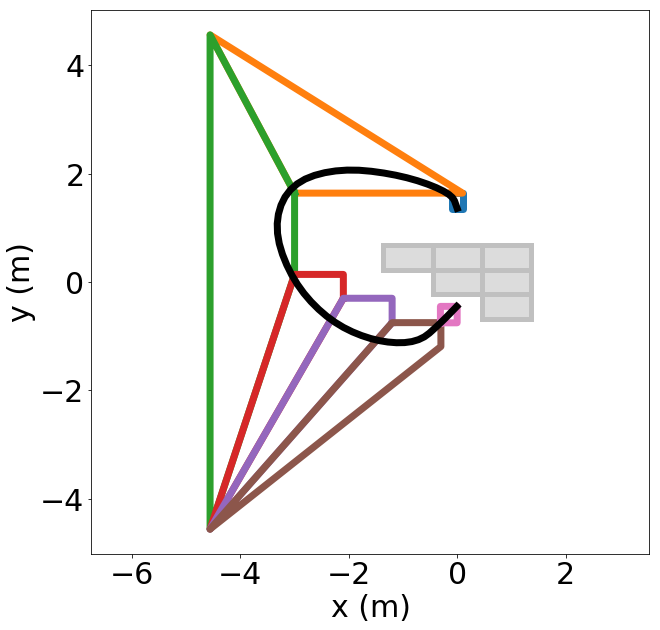

SETTING ENDPOINTS
Calculated C-Space: 0.219590 seconds
Set up graph: 0.367680 seconds
finding_vertex POINT (-0.6796875 0.2265625) 0.0
finding_vertex POINT (0.2265625 0.6796875) 0.0
found path endpoint hulls 30 31
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 182
0.006730 seconds
ADDING COSTS
Number of costs 13
0.022442 seconds
ADDING CONSTRAINTS
None
Number of constraints 1118
0.407758 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.411113 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.068951 seconds
Set up graph: 0.176612 seconds
finding_vertex POINT (-0.6796875 0.2265625) 0.0
finding_vertex POINT (0.2265625 0.6796875) 0.0
found path endpoint hulls 30 31
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.003461 seconds
ADDING COSTS
Number of costs 12
0.006885 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 56
0.032768 seconds
PLANNING
SolutionResult.kSolutionFound
So

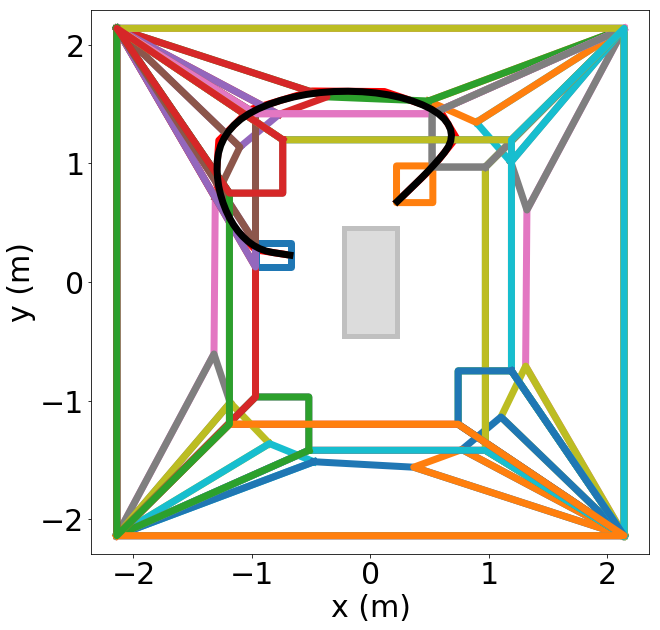

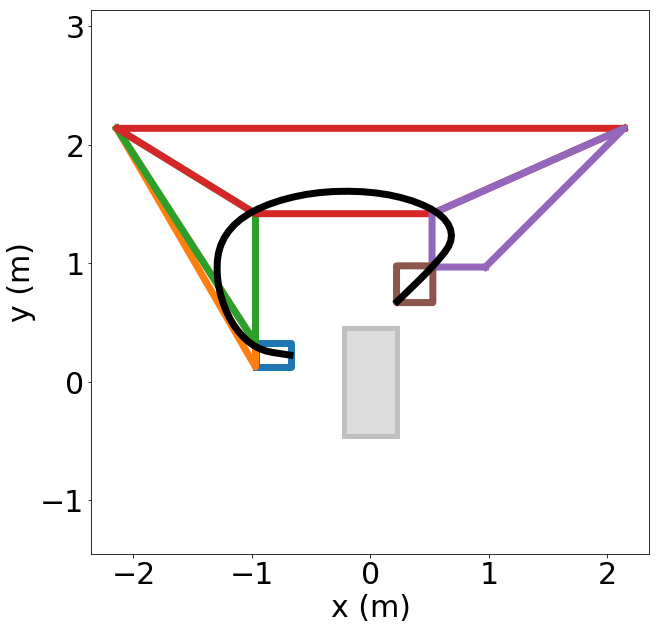

SETTING ENDPOINTS
Calculated C-Space: 0.245638 seconds
Set up graph: 0.300605 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.6796875 0.453125) 0.0
found path endpoint hulls 21 22
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 171
0.006048 seconds
ADDING COSTS
Number of costs 13
0.025198 seconds
ADDING CONSTRAINTS
None
Number of constraints 804
0.373005 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.496784 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.158380 seconds
Set up graph: 0.191444 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.6796875 0.453125) 0.0
found path endpoint hulls 21 22
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.001908 seconds
ADDING COSTS
Number of costs 12
0.004112 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 20
0.019253 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.035

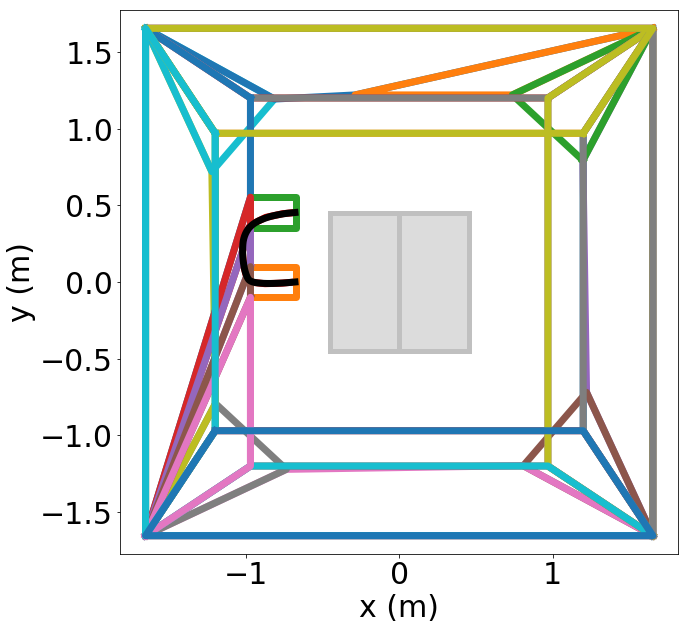

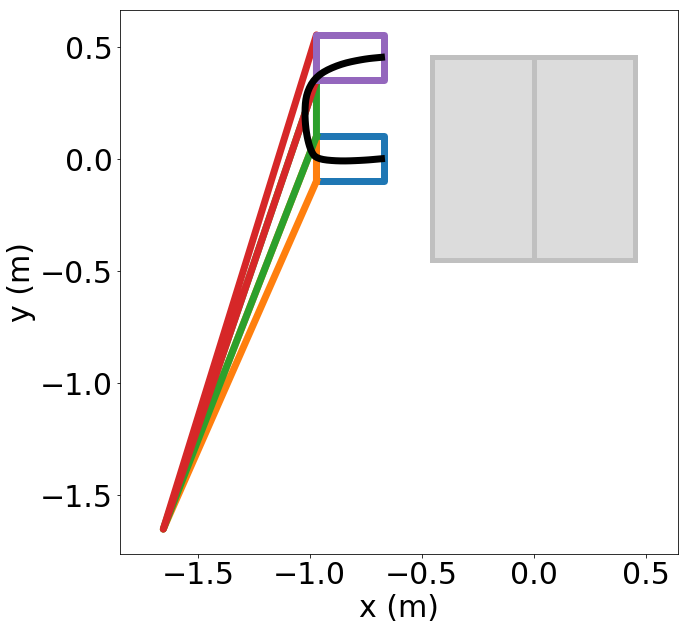

SETTING ENDPOINTS
Calculated C-Space: 0.077351 seconds
Set up graph: 0.645544 seconds
finding_vertex POINT (0.453125 0.90625) 180.0
finding_vertex POINT (0 1.359375) 180.0
found path endpoint hulls 35 32
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 171
0.001928 seconds
ADDING COSTS
Number of costs 13
0.004524 seconds
ADDING CONSTRAINTS
None
Number of constraints 888
0.109491 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.261287 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.138124 seconds
Set up graph: 0.388584 seconds
finding_vertex POINT (0.453125 0.90625) 180.0
finding_vertex POINT (0 1.359375) 180.0
found path endpoint hulls 35 32
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.002024 seconds
ADDING COSTS
Number of costs 12
0.004440 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 50
0.025090 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.02508

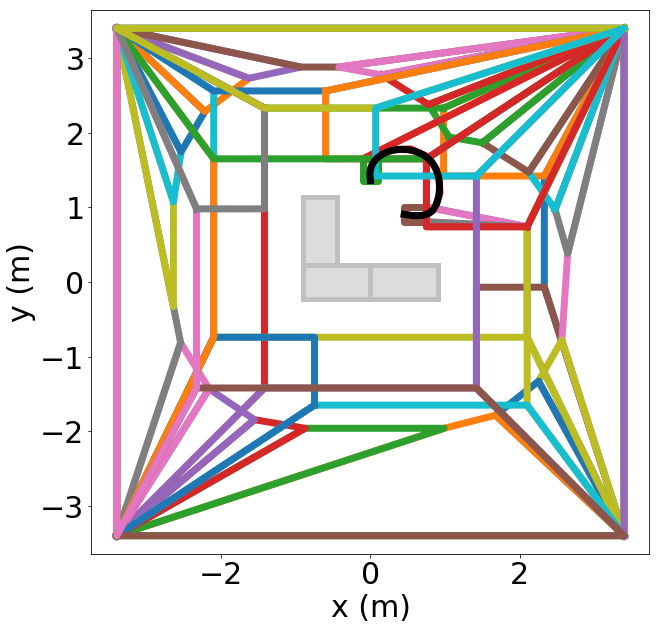

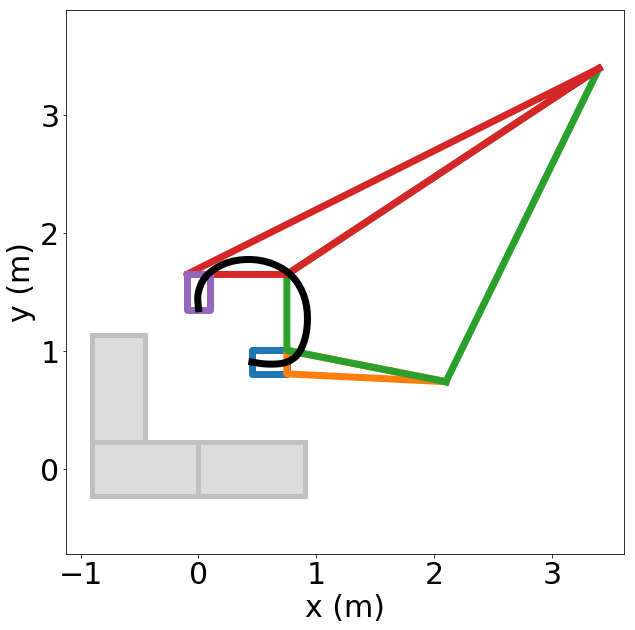

SETTING ENDPOINTS
Calculated C-Space: 0.076303 seconds
Set up graph: 0.135220 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (0 1.359375) 0.0
found path endpoint hulls 30 31
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 171
0.002082 seconds
ADDING COSTS
Number of costs 13
0.016834 seconds
ADDING CONSTRAINTS
None
Number of constraints 930
0.144780 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.212570 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.076763 seconds
Set up graph: 0.186557 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (0 1.359375) 0.0
found path endpoint hulls 30 31
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.002457 seconds
ADDING COSTS
Number of costs 12
0.004967 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 48
0.029148 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.049779 se

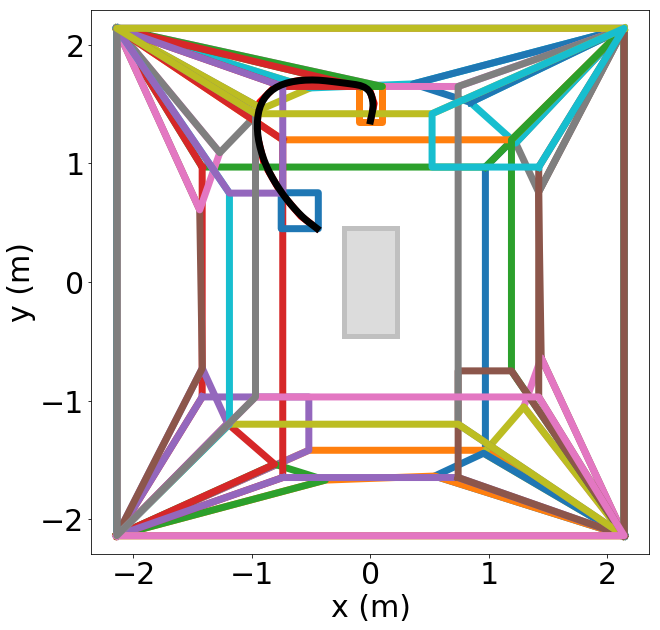

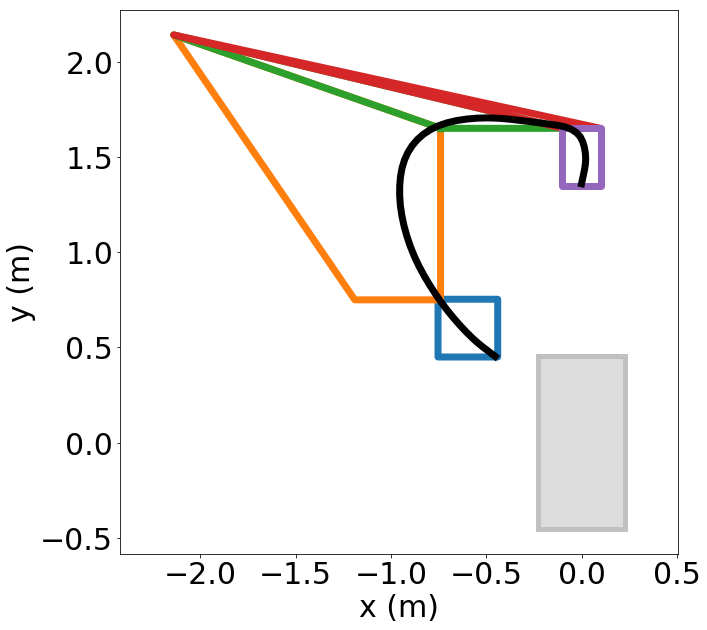

SETTING ENDPOINTS
Calculated C-Space: 0.144164 seconds
Set up graph: 0.191327 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 24 4
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 193
0.002108 seconds
ADDING COSTS
Number of costs 13
0.004594 seconds
ADDING CONSTRAINTS
None
Number of constraints 1222
0.273264 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.131558 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.150836 seconds
Set up graph: 0.082139 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 24 4
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.002331 seconds
ADDING COSTS
Number of costs 12
0.004079 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 30
0.028911 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.023992 seconds

tr

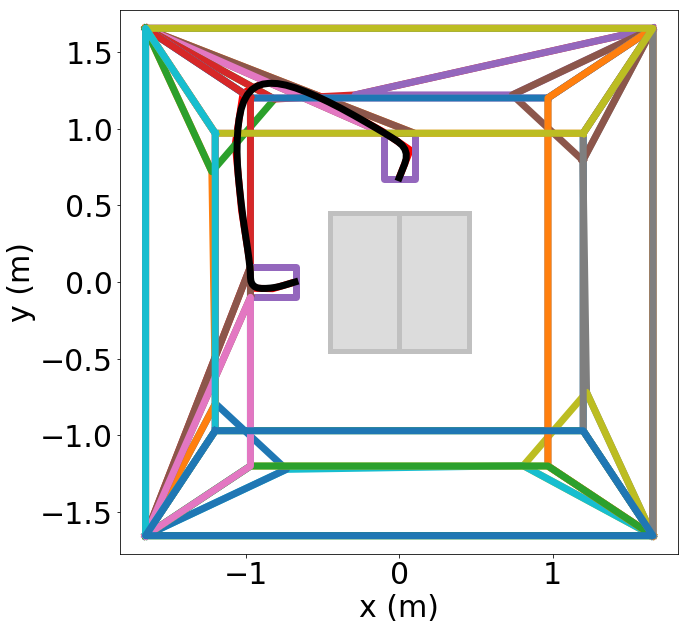

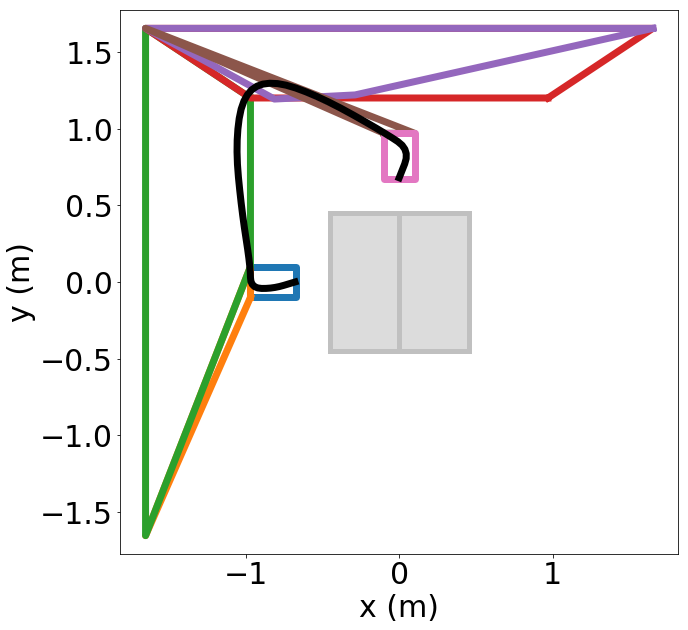

In [13]:
boats = {#'line no-init':(None, ShapeBoat),
         #'spline no-init':(None, ShapeBoat_spline),
         'spline init':(ShapeBoat_spline, ShapeBoat_spline)
        }

results = experiments(tests, boats)

In [14]:
table = print_results_tables(results)

spline init
experiment      solve_time_init    solve_time_final    solve_time    pos_cost_total    ang_cost_total
------------  -----------------  ------------------  ------------  ----------------  ----------------
1_step1                   0.165               0.033         0.198             0.225             0.000
1_step2                   0.233               0.029         0.262             0.232             0.000
2_step1                   0.132               0.024         0.156             0.441             6.598
2_step2                   0.213               0.050         0.262             0.169             0.000
3_step1                   0.497               0.035         0.532             0.027             0.000
3_step2                   0.411               0.021         0.432             0.728             0.000
5                         0.315               0.026         0.341             2.865             0.000
6                         0.261               0.025         0.286     

In [4]:
table = print_results_tables(results)

NameError: name 'results' is not defined

In [9]:
table = print_results_tables(results)

spline init
experiment      solve_time_init    solve_time_final    solve_time    pos_cost_total    ang_cost_total
------------  -----------------  ------------------  ------------  ----------------  ----------------
1_step1                   0.144               0.045         0.188             0.225             0.000
1_step2                   0.220               0.042         0.262             0.232             0.000
2_step1                   0.074               0.026         0.099             0.441             6.598
2_step2                   0.241               0.033         0.274             0.169             0.000
3_step1                   0.213               0.049         0.262             0.027             0.000
3_step2                   0.196               0.021         0.218             0.728             0.000
5                         0.145               0.024         0.169             2.865             0.000
6                         0.212               0.024         0.236     

In [17]:
#print in Banti Thesis Format
print_results_tables(results, latex=True)

spline init
experiment    solve_time_init    solve_time_final    solve_time    pos_cost_total    ang_cost_total
------------  -----------------  ------------------  ------------  ----------------  ----------------
& 1 step1     & 0.170            & 0.040             & 0.200       & 0.220           & 0.000 \\
& 1 step2     & 0.250            & 0.030             & 0.280       & 0.230           & 0.000 \\
& 2 step1     & 0.080            & 0.020             & 0.110       & 0.440           & 6.600 \\
& 2 step2     & 0.230            & 0.030             & 0.260       & 0.170           & 6.600 \\
& 3 step1     & 0.180            & 0.030             & 0.210       & 0.030           & 0.000 \\
& 3 step2     & 0.300            & 0.020             & 0.320       & 0.730           & 0.000 \\
& 5           & 0.130            & 0.020             & 0.150       & 3.380           & 0.000 \\
& 6           & 0.250            & 0.020             & 0.270       & 0.160           & 0.000 \\


In [12]:
write_results(results, 'result_IROS_slow')